## SF crime data analysis and modeling

### In this notebook, you can learn how to use Spark SQL for big data analysis on SF crime data. (https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry). 
The first part of Homework is OLAP for scrime data analysis  
The second part is unsupervised learning for spatial data analysis 
The option part is the time series data analysis  
**Note**: download the small data (one month e.g. 2018-10) for debug, then download the data from 2013 to 2018 for testing and analysising.

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [0]:
# 从SF gov 官网读取下载数据
# 不要反复执行，大家执行一次就好了啊
# 第二次记得comment 掉
#import urllib.request
#urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
#dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
#display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))
## 或者自己下载
# https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD


In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"
# use this file name later

### Solove  big data issues via Spark
approach 1: use RDD (not recommend)  
approach 2: use Dataframe, register the RDD to a dataframe (recommend for DE)  
approach 3: use SQL (recomend for data analysis or DS， 基础比较差的同学)  
***note***: you only need to choose one of approaches as introduced above

In [0]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

## helper function to transform the date, choose your way to do it. 
## 老师我真的是操心了。。。 
# refer: https://jaceklaskowski.gitbooks.io/mastering-spark-sql/spark-sql-functions-datetime.html
# 方法1 使用系统自带udf
# from pyspark.sql.functions import to_date, to_timestamp, hour
# df_opt1 = df_opt1.withColumn('Date', to_date(df_opt1.OccurredOn, "MM/dd/yy"))
# df_opt1 = df_opt1.withColumn('Time', to_timestamp(df_opt1.OccurredOn, "MM/dd/yy HH:mm"))
# df_opt1 = df_opt1.withColumn('Hour', hour(df_opt1['Time']))
# df_opt1 = df_opt1.withColumn("DayOfWeek", date_format(df_opt1.Date, "EEEE"))

## 方法2 手工写udf 
#from pyspark.sql.functions import col, udf
#from pyspark.sql.functions import expr
#from pyspark.sql.functions import from_unixtime

#date_func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())
#month_func = udf (lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%Y/%m'), StringType())

#df = df_opt1.withColumn('month_year', month_func(col('Date')))\
#           .withColumn('Date_time', date_func(col('Date')))

## 方法3 手工在sql 里面
# select Date, substring(Date,7) as Year, substring(Date,1,2) as Month from sf_crime


## 方法4: 使用系统自带
# from pyspark.sql.functions import *
# df_update = df_opt1.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy")) ##change datetype from string to date
# df_update.createOrReplaceTempView("sf_crime")
# crimeYearMonth = spark.sql("SELECT Year(Date) AS Year, Month(Date) AS Month, FROM sf_crime")

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,null,null,null,null,null,null,2,null,null,null,null,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,null,null,null,null,null,null,2,null,null,null,null,106
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,null,null,null,null,null,null,1,null,null,null,null,49
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),null,null,null,null,null,null,null,28588,null,null,null,null,null,null,null,null,null,null,null,null,null
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null,null
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,null,null,null,null,null,null,1,null,null,null,null,91
16010127305073,160101273,05073,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822),53,3,9,20,8,4,8,28853,19,null,null,null,3,null,null,2,null,null,3,null,53
17004924306243,170049243,06243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174),39,10,7,35,1,8,3,56,35,null,null,null,null,null,null,1,null,null,null,null,39
16065828006244,160658280,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647),41,10,8,16,1,8,4,64,14,null,null,null,null,null,null,2,null,null,null,null,41


#### Q1 question (OLAP): 
#####Write a Spark program that counts the number of crimes for different category.

Below are some example codes to demonstrate the way to use Spark RDD, DF, and SQL to work with big data. You can follow this example to finish other questions.

In [0]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


In [0]:
#Spark SQL based
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


<Figure size 432x288 with 0 Axes>

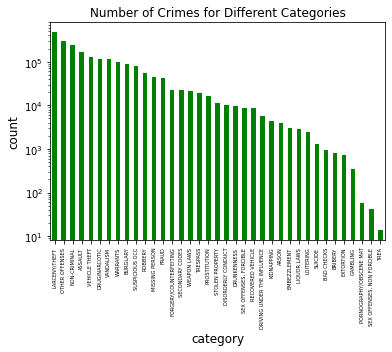

In [0]:
# important hints: 
## first step: spark df or sql to compute the statisitc result 
## second step: export your result to a pandas dataframe. 

# Spark does not support this function, please refer https://matplotlib.org/ for visuliation. You need to use display to show the figure in the databricks community. 

crimes_pd_df = crimeCategory.toPandas()

plt.figure()
ax = crimes_pd_df.plot(kind='bar', x='category', y='Count', logy=True, color='green', legend=False, align='center')
ax.set_xlabel('category', fontsize=12)
ax.set_ylabel('count',fontsize=12)
plt.xticks(fontsize=5)
plt.title('Number of Crimes for Different Categories')
display()

#### Q2 question (OLAP)
Counts the number of crimes for different district, and visualize your results

In [0]:
crimeDistrict = df_opt1.groupby('PdDistrict').count().orderBy('count', ascending=False)
display(crimeDistrict)

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


In [0]:
%sql
SELECT PdDistrict, count(*) AS Count
FROM sf_crime
GROUP BY PdDistrict
ORDER BY Count DESC

PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


<Figure size 432x288 with 0 Axes>

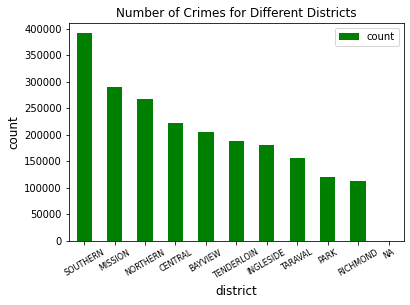

In [0]:
district_pd_df = crimeDistrict.toPandas()

plt.figure()
ax = district_pd_df.plot(kind='bar', x='PdDistrict', y='count', color= 'green', align='center')
ax.set_xlabel('district', fontsize = 12)
ax.set_ylabel('count',fontsize=12)
plt.xticks(fontsize=8, rotation=30)
plt.title('Number of Crimes for Different Districts')
display()

#### Q3 question (OLAP)
Count the number of crimes each "Sunday" at "SF downtown".   
hint 1: SF downtown is defiend  via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

hint 2: SF downtown 物理范围可以是 rectangle a < x < b  and c < y < d. thus, San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297. X and Y represents each. So we assume SF downtown spacial range: X (-122.4213,-122.4313), Y(37.7540,37.7740). 也可以是中心一个圈，距离小于多少算做downtown

In [0]:
from pyspark.sql.functions import month, year, to_date
df_new = df_opt1.withColumn('IncidentDate', to_date(df_opt1.Date, 'MM/dd/yyyy'))
df_new = df_new.withColumn('Month',month(df_new['IncidentDate']))
df_new = df_new.withColumn('Year',year(df_new['IncidentDate']))
#display(df_new)

condition1 = (df_new.X > -122.4313) & (df_new.X < -122.4213) & (df_new.Y < 37.7740) & (df_new.Y > 37.7540) 
condition2 = df_new['DayOfWeek']=='Sunday'
sunday_df=df_new[condition1 & condition2].groupby('IncidentDate').count().orderBy('IncidentDate')
display(sunday_df)

IncidentDate,count
2003-01-05,13
2003-01-12,20
2003-01-19,17
2003-01-26,13
2003-02-02,14
2003-02-09,22
2003-02-16,12
2003-02-23,14
2003-03-02,16
2003-03-09,8


In [0]:
%sql

WITH sunday_crime AS(
SELECT substring(Date,1,5) AS date, substring(Date,7) AS year
FROM sf_crime
WHERE (DayOfWeek = 'Sunday' AND X>-122.4313 AND X<-122.4213 AND Y>37.7540 AND Y<37.7740)
)
SELECT date, year, count(*) AS count
FROM sunday_crime
GROUP BY year, date
ORDER BY year, date

date,year,count
01/05,2003,13
01/12,2003,20
01/19,2003,17
01/26,2003,13
02/02,2003,14
02/09,2003,22
02/16,2003,12
02/23,2003,14
03/02,2003,16
03/09,2003,8


#### Q4 question (OLAP)
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [0]:
df_new.createOrReplaceTempView('sf_crime')

In [0]:
%sql
SELECT Month, Year, COUNT(*) AS Count
FROM sf_crime
WHERE Year IN (2015,2016,2017,2018)
GROUP BY Year, Month
ORDER BY Year, Month

Month,Year,Count
1,2015,13181
2,2015,11882
3,2015,13463
4,2015,12526
5,2015,13318
6,2015,12853
7,2015,12949
8,2015,13317
9,2015,12476
10,2015,12697


<Figure size 432x288 with 0 Axes>

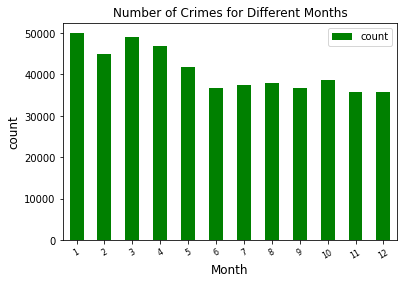

Month,count
1,50067
2,44970
3,49017
4,46837
5,41908
6,36766
7,37498
8,37849
9,36772
10,38580


In [0]:
years = [2015,2016,2017,2018]
df_years = df_new[df_new.Year.isin(years)]
#display(df_years)
year_df = df_years.groupby('Month').count().orderBy('Month')
display(year_df)

years_pd_df = year_df.toPandas()

plt.figure()
ax = years_pd_df.plot(kind='bar', x='Month', y='count', color= 'green', align='center')
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('count',fontsize=12)
plt.xticks(fontsize=8, rotation=30)
plt.title('Number of Crimes for Different Months')
display()

- From the first graph, it is very that the crime rate is really high from 2015 to 2017, and decreases in 2018, significantly from April to May in 2018 .
- From the second graph, January could be considered as the 'month has highest crime rates through the year'.
- Throughout the research, the decline in 2018 might because of the increasing uniformed police by SFPD.
- Based on the insights, business owners might want more power to portect their retail stores and their customers in January.

#### Q5 question (OLAP)
Analysis the number of crime with respsect to the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [0]:
from pyspark.sql.functions import hour, to_timestamp
df_new1 = df_new.withColumn('IncidentTime', to_timestamp(df_new['Time'],'HH:mm'))
df_new1 = df_new1.withColumn('Hour', hour(df_new1['IncidentTime']))

dates = ['12/25/2015','12/25/2016','12/25/2017']
days_df = df_new1[df_new1.Date.isin(dates)]
daysCrime = days_df.groupby(['Date','Hour']).count().orderBy('Date','Hour')
display(daysCrime)

Date,Hour,count
12/25/2015,0,26
12/25/2015,1,15
12/25/2015,2,3
12/25/2015,3,10
12/25/2015,4,5
12/25/2015,5,2
12/25/2015,6,4
12/25/2015,7,8
12/25/2015,8,6
12/25/2015,9,3


In [0]:
%sql
SELECT substring(Time,1,2) AS Hour, Date, COUNT(*) AS count
FROM sf_crime
WHERE Date LIKE '12/25/%' AND Year IN(2013,2014,2015,2016,2017)
GROUP BY Date, Hour
ORDER BY Date, Hour

Hour,Date,count
00,12/25/2013,4
01,12/25/2013,6
02,12/25/2013,1
03,12/25/2013,1
04,12/25/2013,2
06,12/25/2013,2
07,12/25/2013,6
08,12/25/2013,10
09,12/25/2013,4
10,12/25/2013,4


It can be seen clearly that crimes happened a lot more at the midnight on Christmas. While visiting family for friends in SF, it is better to stay safe at home and protect yourself during midnight.

#### Q6 question (OLAP)
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

In [0]:
%sql
SELECT PdDistrict, COUNT(*) AS Count
FROM sf_crime
GROUP BY PdDistrict
ORDER BY Count DESC
LIMIT 3

PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435


In [0]:
%sql
SELECT Category, substring(Time,1,2) AS Hour, COUNT(*) AS Count
FROM sf_crime
WHERE PdDistrict IN ('SOUTHERN','MISSION','NORTHERN')
GROUP BY Hour, Category
ORDER BY Category, Hour

Category,Hour,Count
ARSON,00,84
ARSON,01,77
ARSON,02,84
ARSON,03,95
ARSON,04,74
ARSON,05,60
ARSON,06,50
ARSON,07,28
ARSON,08,34
ARSON,09,28


- According to step 1, the top three dangerous districts are SOUTHERN, MISSION, and NORTHERN. SFPD might need increase police power in these districts.
- According to step 2, it can be seen that crimes are more likely to happen in the afternoon from 12pm to 7pm, and less likely to happen 1am to 6am, especially theft. SFPD might want to pay more attention to theives during the afternoon time periods.

#### Q7 question (OLAP)
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [0]:
from pyspark.sql.window import Window
import pyspark.sql.functions as func

#check_none = udf (lambda x: x!='NONE')
df_new2 = df_new[['Category','Resolution']]
#df_new2 = df_new2.withColumn('Resolved', check_none(func.col('Resolution')))
#df_new2 = df_new2.where(func.col('Resolution') != 'NONE')
df_q7 = df_new2.groupBy('Category','Resolution').count().withColumnRenamed('count', 'ResNum_ineach_Category').orderBy('Category')
df_q7 = df_q7.withColumn('Total', func.sum('ResNum_ineach_Category').over(Window.partitionBy(df_q7['Category'])))
df_q7 = df_q7.withColumn('ResolvedPercentage',\
                        100-(func.col('ResNum_ineach_Category')*100/func.col('Total'))).orderBy('ResolvedPercentage',ascending=False)
df_q7 = df_q7.where(func.col('Resolution') == 'NONE')
display(df_q7)

Category,Resolution,ResNum_ineach_Category,Total,ResolvedPercentage
PROSTITUTION,NONE,850,16501,94.84879704260348
WARRANTS,NONE,5482,99821,94.50816962362629
DRIVING UNDER THE INFLUENCE,NONE,317,5652,94.39136588818117
DRUG/NARCOTIC,NONE,10256,117821,91.2952699433887
LIQUOR LAWS,NONE,313,2840,88.97887323943662
LOITERING,NONE,299,2402,87.55203996669442
STOLEN PROPERTY,NONE,1439,11450,87.43231441048034
DRUNKENNESS,NONE,1725,9760,82.32581967213115
OTHER OFFENSES,NONE,86815,301874,71.24131260062146
WEAPON LAWS,NONE,6070,21004,71.1007427156732


In [0]:
from pyspark.sql.window import Window
import pyspark.sql.functions as func

df_new2 = df_new[['Category','Resolution']]
df_new2 = df_new2.where(func.col('Resolution') != 'NONE')
df_q7 = df_new2.groupBy('Category','Resolution').count().withColumnRenamed('count', 'ResNum_ineach_Category').orderBy('Category')
df_q7 = df_q7.withColumn('Total', func.sum('ResNum_ineach_Category').over(Window.partitionBy(df_q7['Category'])))
df_q7 = df_q7.withColumn('Percentage',\
                        func.col('ResNum_ineach_Category')*100/func.col('Total')).orderBy('Category','Percentage',ascending=False)
display(df_q7)

Category,Resolution,ResNum_ineach_Category,Total,Percentage
WEAPON LAWS,"ARREST, BOOKED",13334,14934,89.28619258068836
WEAPON LAWS,"ARREST, CITED",1157,14934,7.7474219900897285
WEAPON LAWS,UNFOUNDED,156,14934,1.0445962233828847
WEAPON LAWS,DISTRICT ATTORNEY REFUSES TO PROSECUTE,94,14934,0.6294361858845587
WEAPON LAWS,NOT PROSECUTED,66,14934,0.44194455604660504
WEAPON LAWS,COMPLAINANT REFUSES TO PROSECUTE,45,14934,0.3013258336681398
WEAPON LAWS,EXCEPTIONAL CLEARANCE,39,14934,0.2611490558457212
WEAPON LAWS,PSYCHOPATHIC CASE,20,14934,0.13392259274139548
WEAPON LAWS,PROSECUTED BY OUTSIDE AGENCY,15,14934,0.1004419445560466
WEAPON LAWS,LOCATED,7,14934,0.04687290745948842


- From the form, we can see that the top three categories of crimes made action by police are PROSTITUTION, WARRANTS, DRIVING UNDER THE INFLUENCE, the top three categories of crimes that police not making actions are LARCENY/THEFT, VEHICLE THEFT, RECOVERED VEHICLE.
- From the chart, we can see that 'ARRESTED,BOOKED' is the most common resolution to most crimes.
- SFPD can increase more force again theft crimes.

#### Q8 question: 
Analysis the new columns of the data and find how to use the new columns (e.g., like 'Fire Prevention Districts' etc)

- By using the columns such as 'Fire Prevention Districts' and 'Police Districts', we can analyze see if there is a relationship between the number of crimes happened in certain district and the number of SFFD and SFPD? 
- We can also analyze see whether the resolve rate for the crimes are higher when crimes happened cloer to SFPD and SFFD.
- By using the zipcode, we can analyze which area has higher or lower crime rates and increase or decrease police power based on this information.

In [0]:
display(df_new)

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,IncidentDate,Month,Year
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2003-09-28,9,2003
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,null,null,null,null,null,null,2,null,null,null,null,97,2005-06-22,6,2005
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,null,null,null,null,null,null,2,null,null,null,null,106,2006-07-15,7,2006
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,null,null,null,null,null,null,1,null,null,null,null,49,2007-09-25,9,2007
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),null,null,null,null,null,null,null,28588,null,null,null,null,null,null,null,null,null,null,null,null,null,2011-09-24,9,2011
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null,null,2003-12-12,12,2003
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,null,null,null,null,null,null,1,null,null,null,null,91,2004-12-30,12,2004
16010127305073,160101273,05073,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822),53,3,9,20,8,4,8,28853,19,null,null,null,3,null,null,2,null,null,3,null,53,2016-02-03,2,2016
17004924306243,170049243,06243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174),39,10,7,35,1,8,3,56,35,null,null,null,null,null,null,1,null,null,null,null,39,2017-01-18,1,2017
16065828006244,160658280,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647),41,10,8,16,1,8,4,64,14,null,null,null,null,null,null,2,null,null,null,null,41,2016-08-14,8,2016


### Conclusion. 
Use four sentences to summary your work. Like what you have done, how to do it, what the techinical steps, what is your business impact. 
More details are appreciated. You can think about this a report for your manager. Then, you need to use this experience to prove that you have strong background on big  data analysis.  
Point 1:  what is your story ? and why you do this work ?   
Point 2:  how can you do it ?  keywords: Spark, Spark SQL, Dataframe, Data clean, Data visulization, Data size, clustering, OLAP,   
Point 3:  what do you learn from the data ?  keywords: crime, trend, advising, conclusion, runtime

I am interested in this dataset because I am considering move to SF and being familiar with the crime data there helps me have a better understanding of their safety conditions, such as knowing which area is not safe to go or the time period I need to pay more attention when hangout.

In this project, I analyzed the crime rates of multiple categories in different districts, different time of the date, different month/year through 2003 to May 2018 in SanFransisco.

To achieve my goal, I analyzed the data on Spark platform by data cleansing, data processing, and data visualization. I also used different methods to deal with the same data, by using dataframe and SQL method. From which, I realized that: most crimes happened after 1pm during a day, and 6 pm is considered to be the top one crime happened hour in the day. The most dangerous areas are SOUTHERN, MISSION, NORTHERN; SOUTHERN district has a significant more crime rates than the rest two, which should remind me this are might not be a good choice to hangout alone. Among all the crimes, theft crimes is the one happened most, which reminds me keeping an eye on my personal stuff is mandatary if moving to SF. I also realized that the resolutions to the  crimes are not that effective in SF, there are still a lot of cases that SFPD did not take an action on it, especally theft cases. SFPD might want to increase some more police power to resolve the theft crimes issues.

### Optional part: Clustering
You can apply Spark ML custering algorithm to cluster the spatial data, then visualize the clustering results. Do not do this until you understand Spark ML, we would like to cover this in the DS track.

### Optional part: Time series analysis
This part is not based on Spark, and only based on Pandas Time Series package.   
Note: I am not familiar with time series model, please refer the ARIMA model introduced by other teacher.   
process:  
1.visualize time series  
2.plot ACF and find optimal parameter  
3.Train ARIMA  
4.Prediction 

Refer:   
https://zhuanlan.zhihu.com/p/35282988  
https://zhuanlan.zhihu.com/p/35128342  
https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html  
https://www.howtoing.com/a-guide-to-time-series-forecasting-with-arima-in-python-3  
https://www.joinquant.com/post/9576?tag=algorithm  
https://blog.csdn.net/u012052268/article/details/79452244